2020-06-08 22:25:07 model initialized
2020-06-08 22:25:09 validation dataset created and saved on the disk
Evaluating baseline model on baseline dataset (epoch = 0)
2020-06-08 22:25:32 baseline initialized
Current decode type: sampling
grad_global_norm = 9.725430488586426, clipped_norm = 1.0
Epoch 0 (batch = 0): Loss: -1.4149560928344727: Cost: 30.203411102294922
Evaluating candidate model on baseline dataset (callback epoch = 0)
Epoch 0 candidate mean 21.85548973083496, baseline epoch 0 mean 24.583406448364258, difference -2.727916717529297
p-value: 0.0
Update baseline
Evaluating baseline model on baseline dataset (epoch = 0)
alpha was updated to 1.0
Validation score: 21.854299545288086
2020-06-08 22:26:51 Epoch 0: Loss: 18.2507381439209: Cost: 30.057886123657227
Current decode type: sampling
grad_global_norm = 28.115816116333008, clipped_norm = 0.9999999403953552
Epoch 1 (batch = 0): Loss: -1056.3404541015625: Cost: 29.094953536987305
Evaluating candidate model on baseline dataset (c

Rollout greedy execution: 10it [00:17,  1.70s/it]
batch calculation at epoch 0: 4it [00:09,  2.31s/it]
Rollout greedy execution: 10it [00:23,  2.37s/it]
Rollout greedy execution: 10it [00:21,  2.15s/it]
Rollout greedy execution: 10it [00:21,  2.12s/it]
Rollout greedy execution: 1it [00:01,  1.50s/it]
batch calculation at epoch 1: 4it [00:08,  2.01s/it]
Rollout greedy execution: 10it [00:22,  2.29s/it]
Rollout greedy execution: 10it [00:24,  2.44s/it]
Rollout greedy execution: 1it [00:01,  1.70s/it]
batch calculation at epoch 2: 4it [00:09,  2.35s/it]
Rollout greedy execution: 10it [00:27,  2.70s/it]
Rollout greedy execution: 10it [00:26,  2.68s/it]
Rollout greedy execution: 1it [00:01,  1.78s/it]
batch calculation at epoch 3: 4it [00:08,  2.11s/it]
Rollout greedy execution: 10it [00:24,  2.42s/it]
Rollout greedy execution: 10it [00:23,  2.39s/it]
Rollout greedy execution: 1it [00:01,  1.46s/it]
batch calculation at epoch 4: 4it [00:07,  1.99s/it]
Rollout greedy execution: 10it [00:22, 

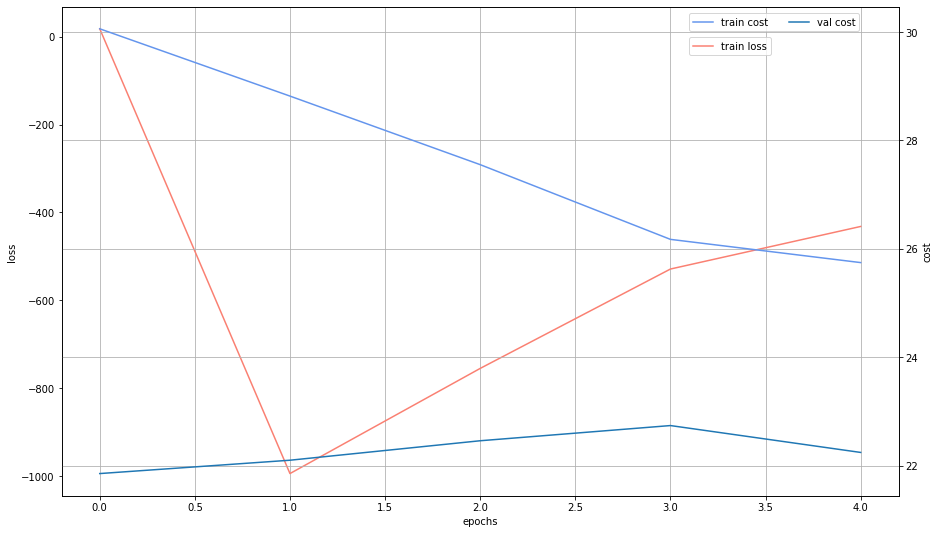

In [1]:
import tensorflow as tf
from time import gmtime, strftime

from attention_dynamic_model import AttentionDynamicModel, set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from utils import create_data_on_disk, get_cur_time

# Params of model
SAMPLES = 512 # 128*10000
BATCH = 128
START_EPOCH = 0
END_EPOCH = 5
FROM_CHECKPOINT = False
embedding_dim = 128
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 1000
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 50
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))

# Initialize model
model_tf = AttentionDynamicModel(embedding_dim)
set_decode_type(model_tf, "sampling")
print(get_cur_time(), 'model initialized')

# Create and save validation dataset
validation_dataset = create_data_on_disk(GRAPH_SIZE,
                                         VALIDATE_SET_SIZE,
                                         is_save=True,
                                         filename=FILENAME,
                                         is_return=True,
                                         seed = SEED)
print(get_cur_time(), 'validation dataset created and saved on the disk')

# Initialize optimizer
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

# Initialize baseline
baseline = RolloutBaseline(model_tf,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = 0,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE
                           )
print(get_cur_time(), 'baseline initialized')

train_model(optimizer,
            model_tf,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            from_checkpoint = FROM_CHECKPOINT,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )

2020-06-08 22:34:19 model loaded
2020-06-08 22:34:37 validation dataset loaded
Baseline model loaded
Evaluating baseline model on baseline dataset (epoch = 5)
2020-06-08 22:35:04 baseline initialized
Skipping warm-up mode
Current decode type: sampling
grad_global_norm = 26.102819442749023, clipped_norm = 1.0
Epoch 5 (batch = 0): Loss: -345.30181884765625: Cost: 25.446109771728516
Evaluating candidate model on baseline dataset (callback epoch = 5)
Epoch 5 candidate mean 21.632471084594727, baseline epoch 5 mean 21.833660125732422, difference -0.2011890411376953
p-value: 9.040636112091681e-30
Update baseline
Evaluating baseline model on baseline dataset (epoch = 5)
Validation score: 21.669300079345703
2020-06-08 22:36:18 Epoch 5: Loss: -294.31036376953125: Cost: 24.854333877563477
Current decode type: sampling
grad_global_norm = 19.719280242919922, clipped_norm = 1.0
Epoch 6 (batch = 0): Loss: -253.8420867919922: Cost: 23.864578247070312
Evaluating candidate model on baseline dataset (ca

Rollout greedy execution: 10it [00:23,  2.33s/it]
Rollout greedy execution: 1it [00:01,  1.66s/it]
batch calculation at epoch 5: 4it [00:08,  2.01s/it]
Rollout greedy execution: 10it [00:19,  1.99s/it]
Rollout greedy execution: 10it [00:20,  2.08s/it]
Rollout greedy execution: 10it [00:20,  2.05s/it]
Rollout greedy execution: 1it [00:01,  1.75s/it]
batch calculation at epoch 6: 4it [00:08,  2.05s/it]
Rollout greedy execution: 10it [00:20,  2.09s/it]
Rollout greedy execution: 10it [00:21,  2.14s/it]
Rollout greedy execution: 10it [00:21,  2.17s/it]
Rollout greedy execution: 1it [00:01,  1.45s/it]
batch calculation at epoch 7: 4it [00:07,  1.99s/it]
Rollout greedy execution: 10it [00:18,  1.84s/it]
Rollout greedy execution: 10it [00:18,  1.81s/it]
Rollout greedy execution: 10it [00:18,  1.81s/it]
Rollout greedy execution: 1it [00:01,  1.27s/it]
batch calculation at epoch 8: 4it [00:06,  1.73s/it]
Rollout greedy execution: 10it [00:16,  1.62s/it]
Rollout greedy execution: 10it [00:16,  1.

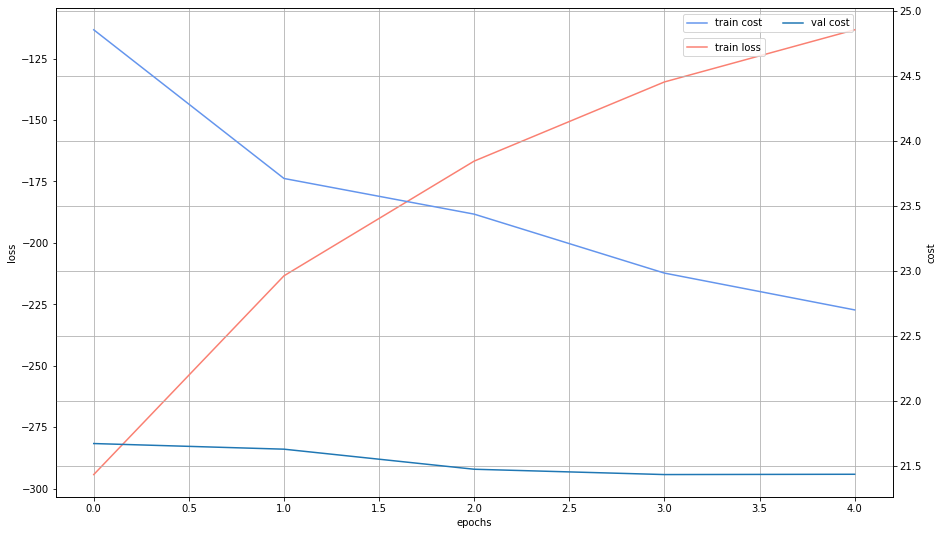

In [1]:
import tensorflow as tf
from time import gmtime, strftime

from attention_dynamic_model import set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from utils import get_cur_time
from reinforce_baseline import load_tf_model
from utils import read_from_pickle


SAMPLES = 512 # 128*10000
BATCH = 128
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 1000
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 50
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))

START_EPOCH = 5
END_EPOCH = 10
FROM_CHECKPOINT = True
embedding_dim = 128
MODEL_PATH = 'model_checkpoint_epoch_4_VRP_50_2020-06-08.h5'
VAL_SET_PATH = 'Validation_dataset_VRP_50_2020-06-08.pkl'
BASELINE_MODEL_PATH = 'baseline_checkpoint_epoch_0_VRP_50_2020-06-08.h5'

# Initialize model
model_tf = load_tf_model(MODEL_PATH,
                         embedding_dim=embedding_dim,
                         graph_size=GRAPH_SIZE)
set_decode_type(model_tf, "sampling")
print(get_cur_time(), 'model loaded')

# Create and save validation dataset
validation_dataset = read_from_pickle(VAL_SET_PATH)
print(get_cur_time(), 'validation dataset loaded')

# Initialize optimizer
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

# Initialize baseline
baseline = RolloutBaseline(model_tf,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = START_EPOCH,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE,
                           path_to_checkpoint = BASELINE_MODEL_PATH)
print(get_cur_time(), 'baseline initialized')

train_model(optimizer,
            model_tf,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            from_checkpoint = FROM_CHECKPOINT,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )